In [1]:
import sys
sys.path.append('C:\\Users\\xpy\\work\\strategies2py\\AprilQuant')
import warnings
from collections import defaultdict, OrderedDict

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import empyrical

from backtest.return_rate_calculations import (
    cal_avg_cum_ret, 
    avg_cum_ret_from_cursor, 
    cal_ret, 
    cum_ret_from_doc,
    avg_annual_ret
)
from utils import query, plot_curves
from consts import C_DAILY

warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False 


DB = 'MOM'
period_rng = (5, 20, 40, 60, 120, 240)

# 策略整体表现
使用复权价格/真实价格产生交易信号

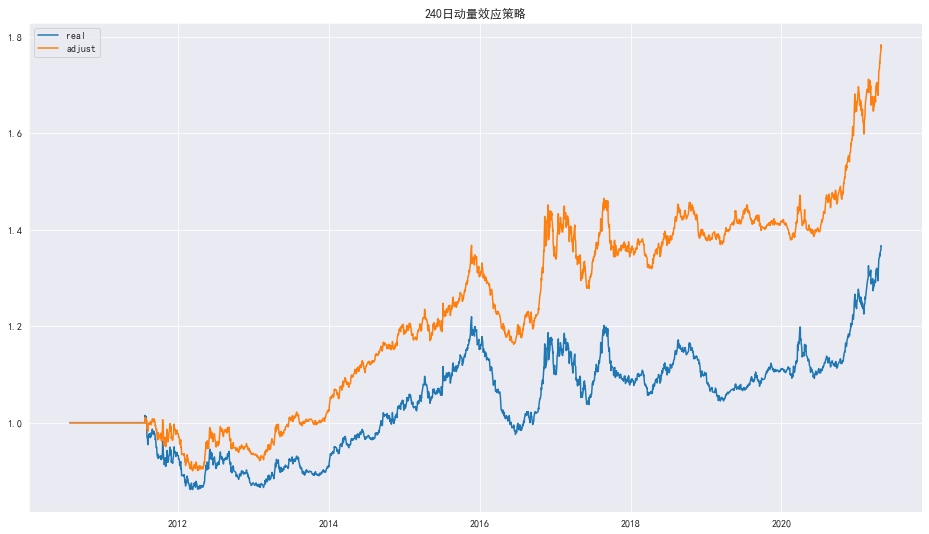

In [2]:
cursor_real = query(db_name=DB, col='daily', period=240, use_real_price=True)
cum_ret_real = avg_cum_ret_from_cursor(cursor_real) 

cursor_adjust = query(db_name=DB, col='daily', period=240, use_real_price=False)
cum_ret_adjust = avg_cum_ret_from_cursor(cursor_adjust)

plot_curves([cum_ret_real, cum_ret_adjust], u'240日动量效应策略', ['real', 'adjust'])

# 策略在各品种上的表现

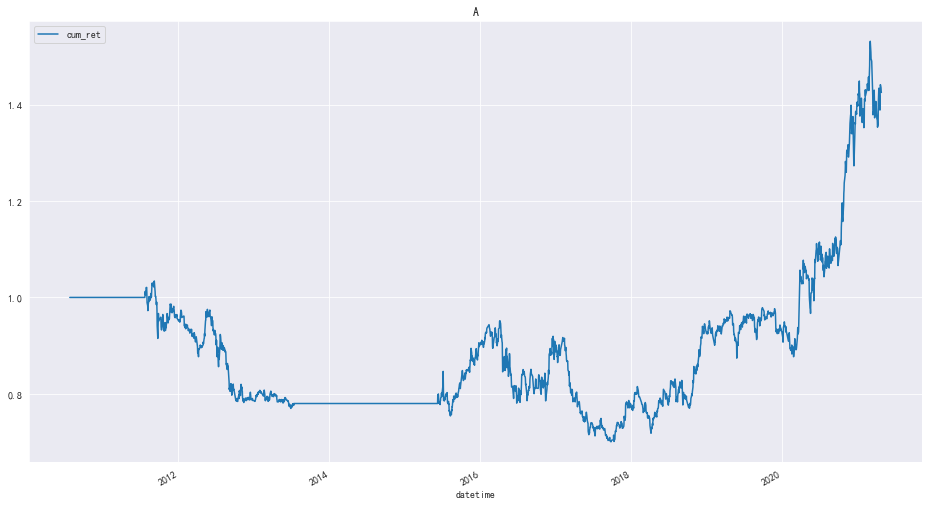

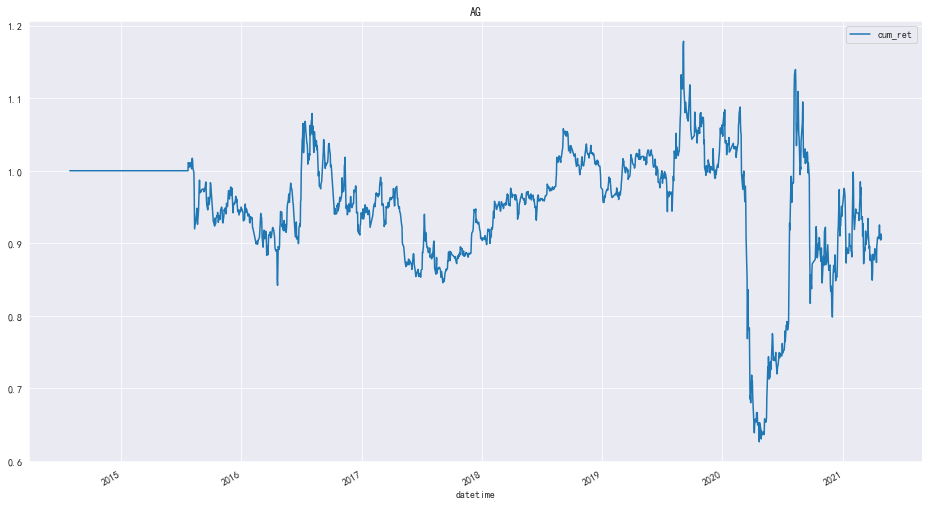

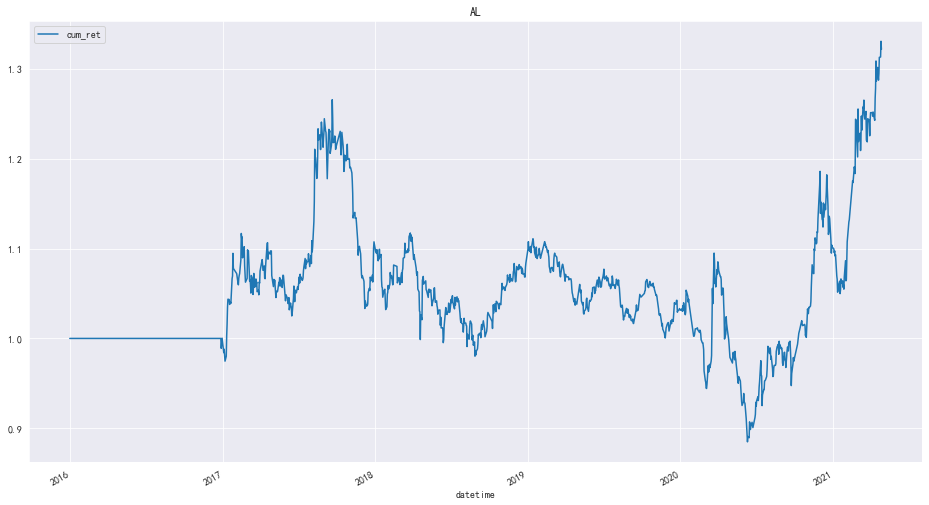

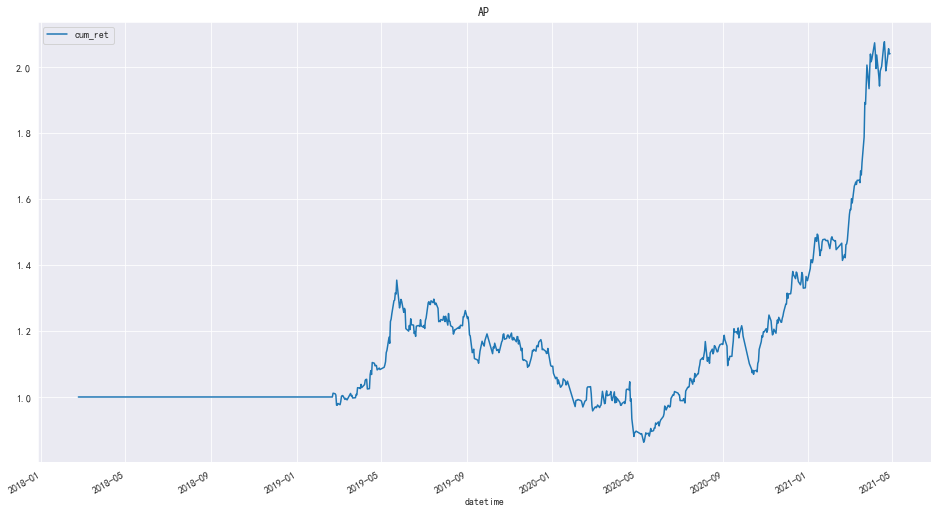

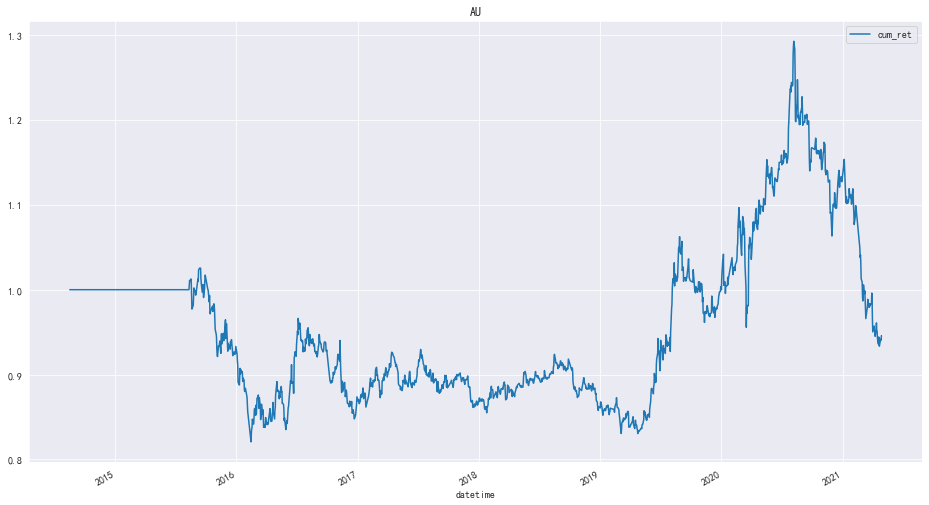

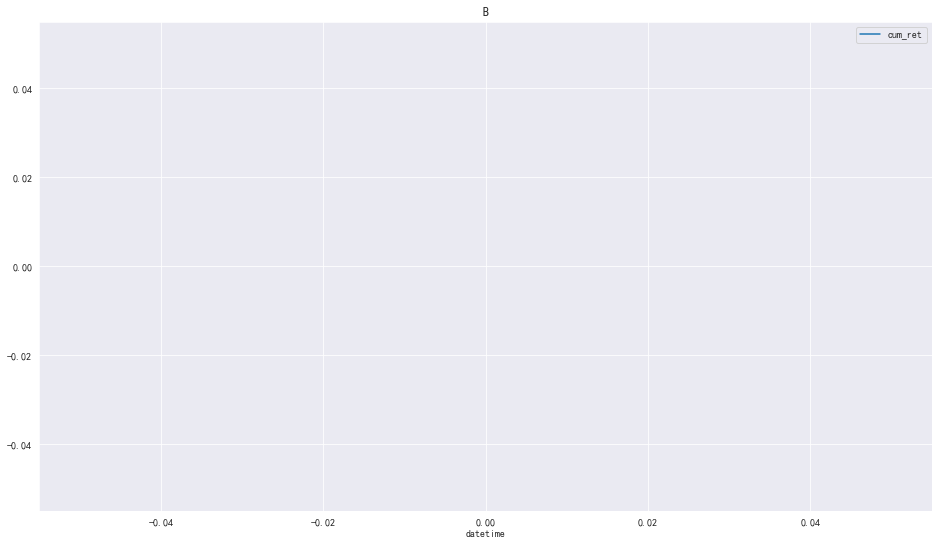

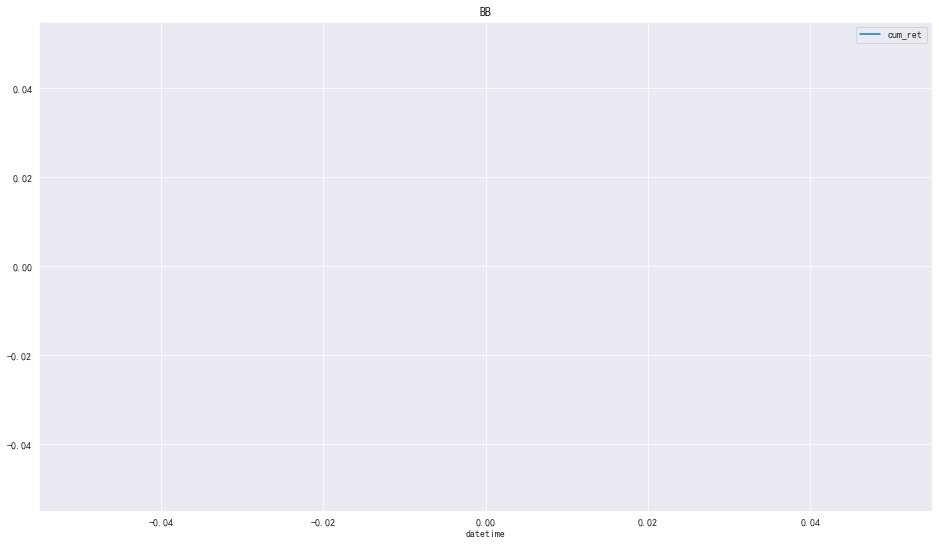

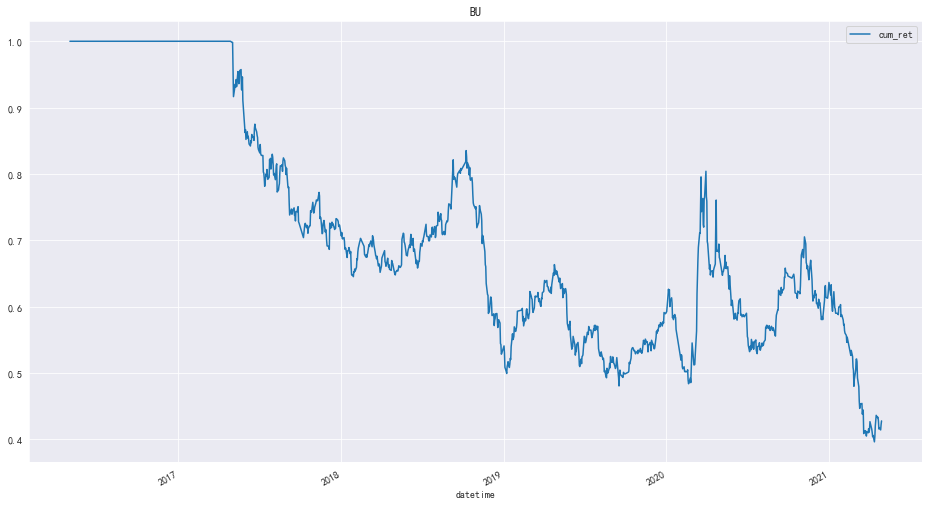

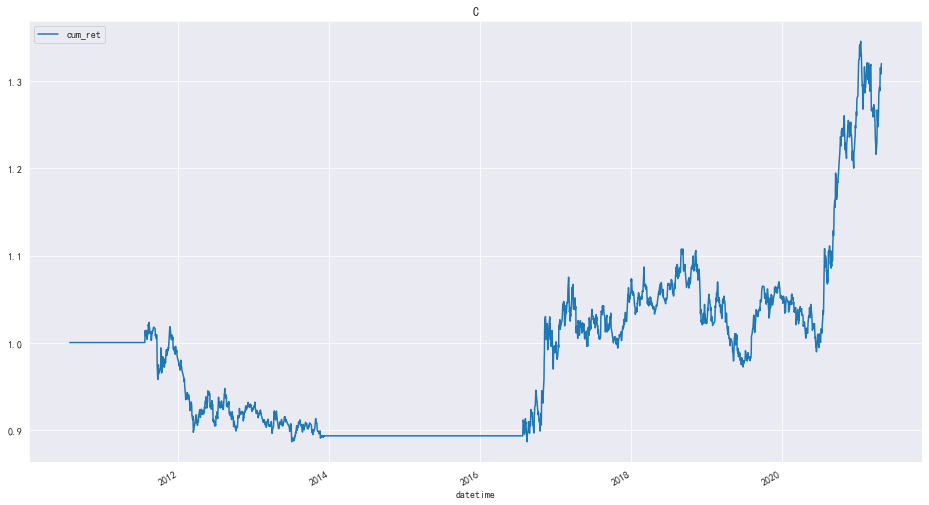

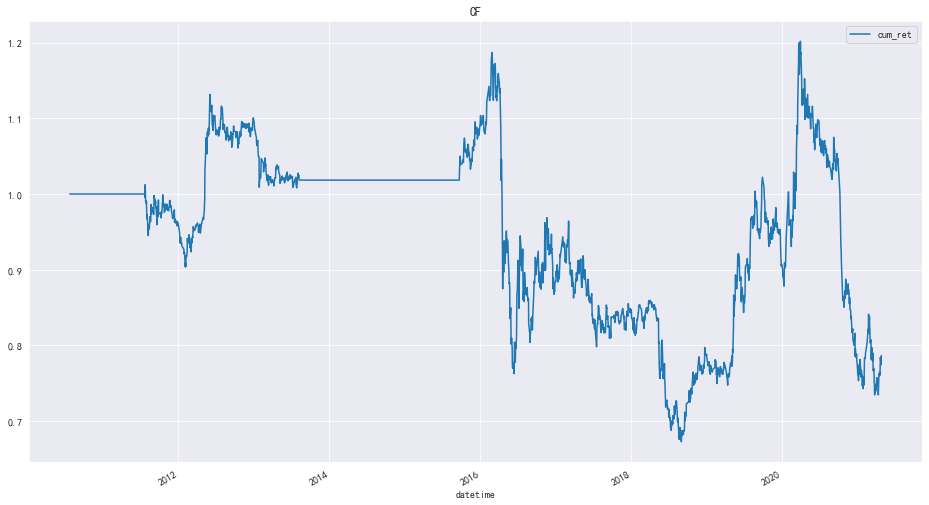

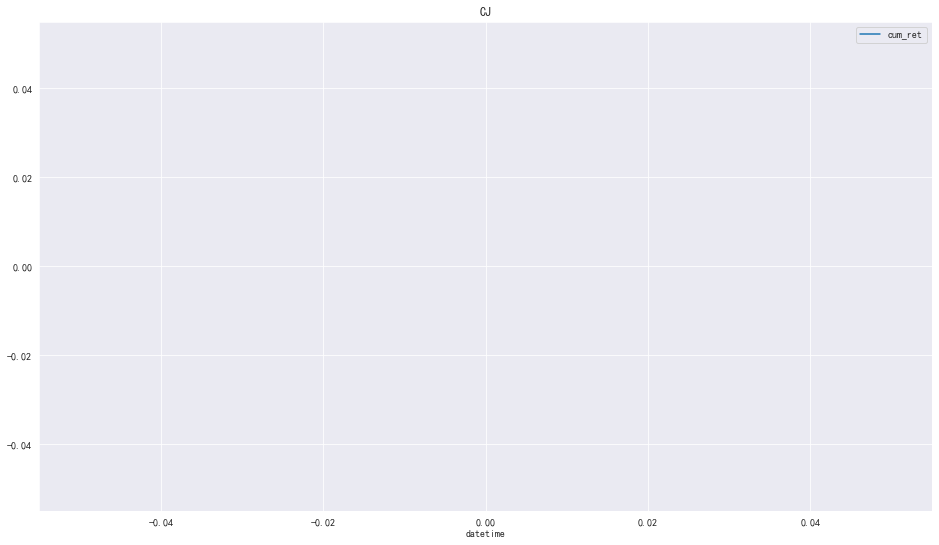

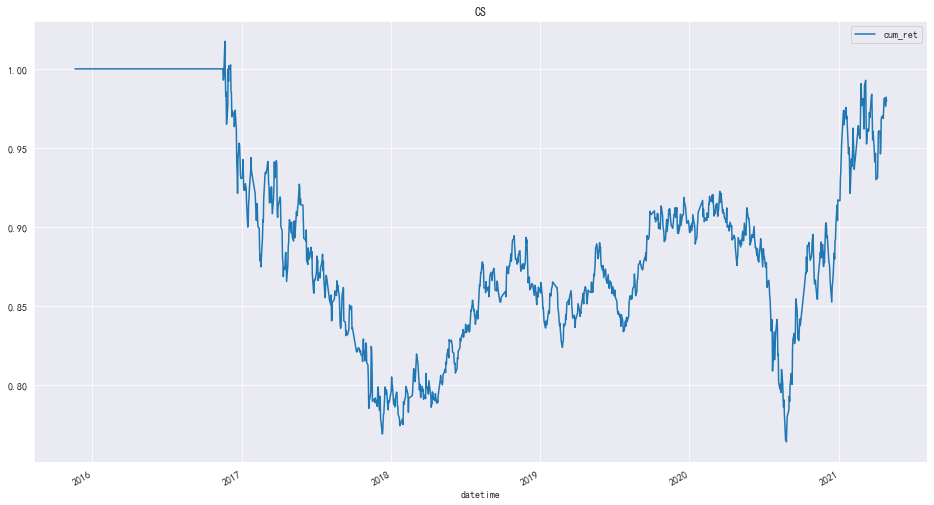

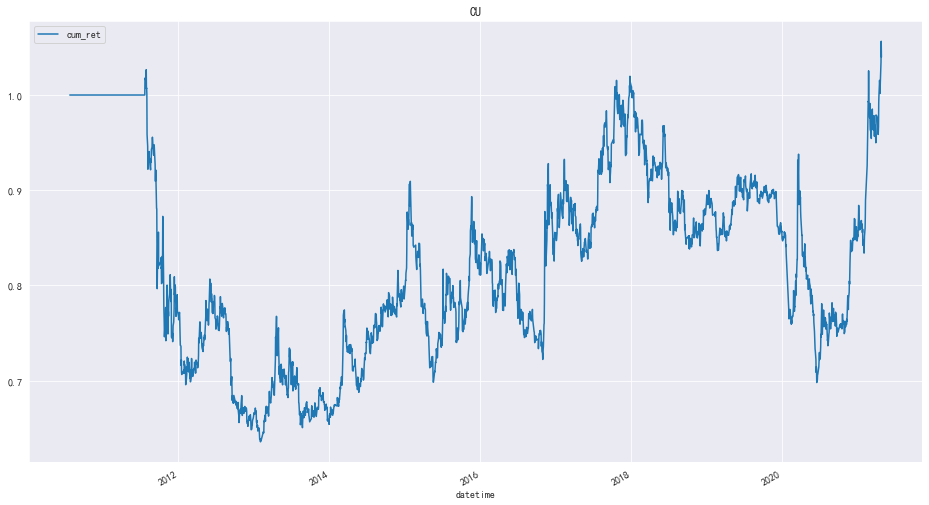

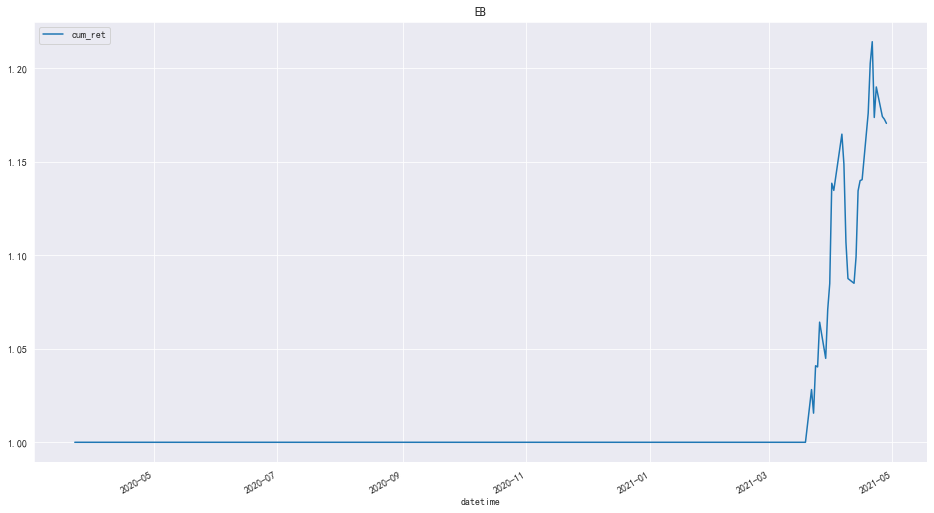

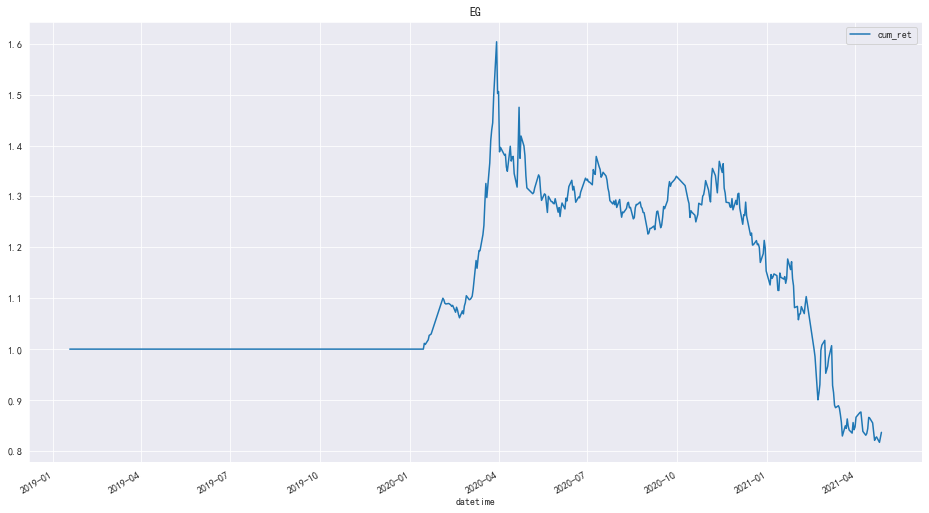

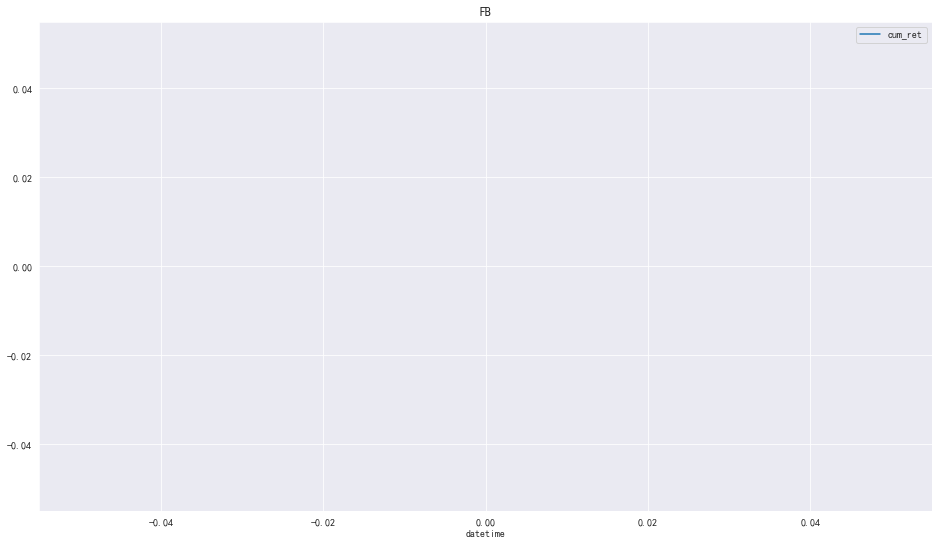

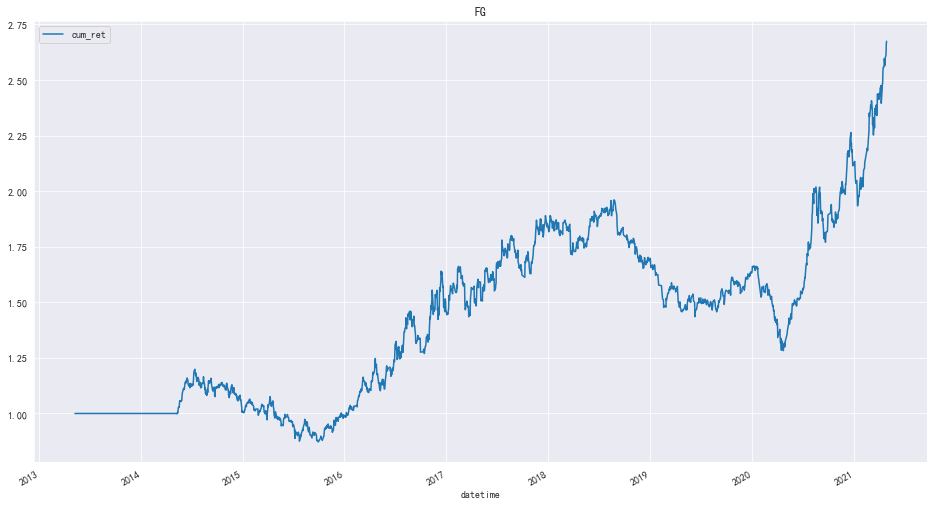

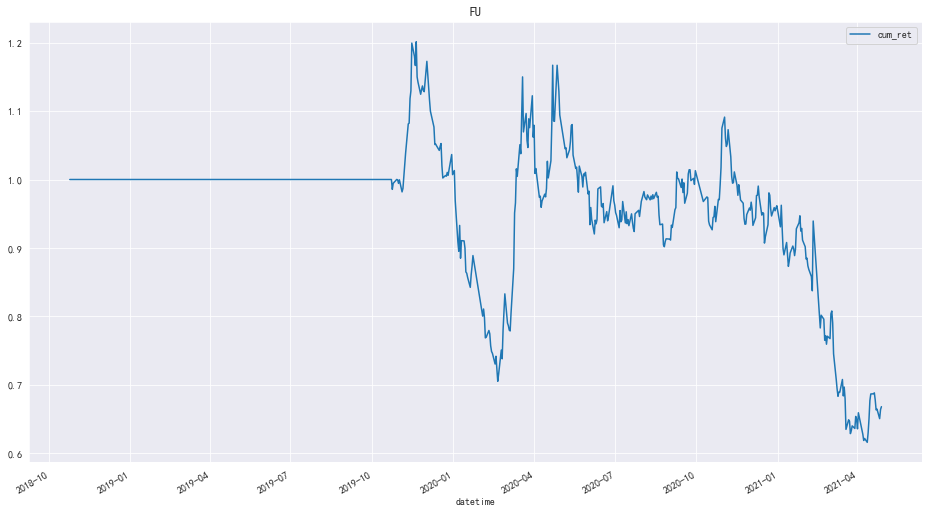

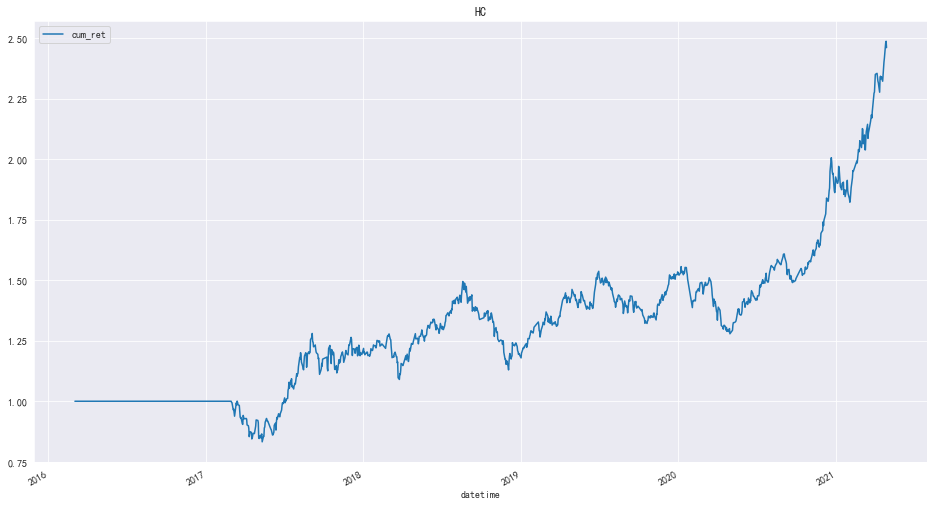

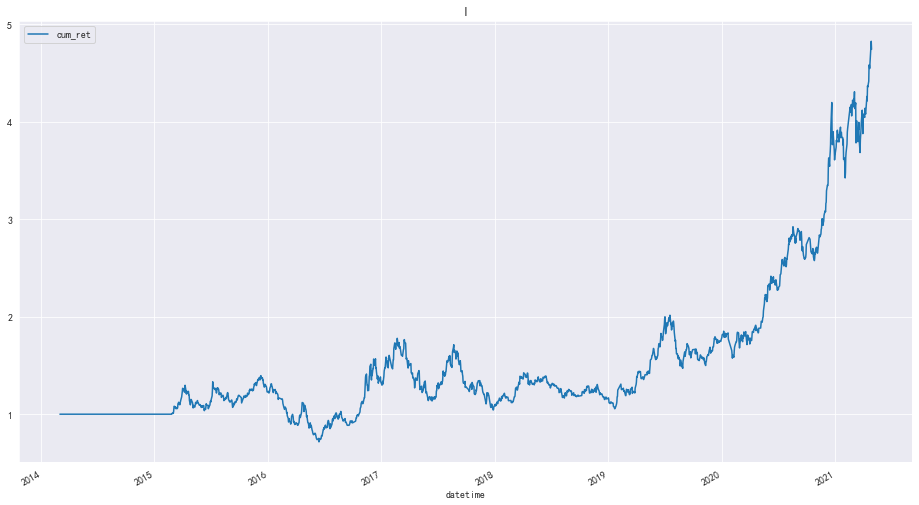

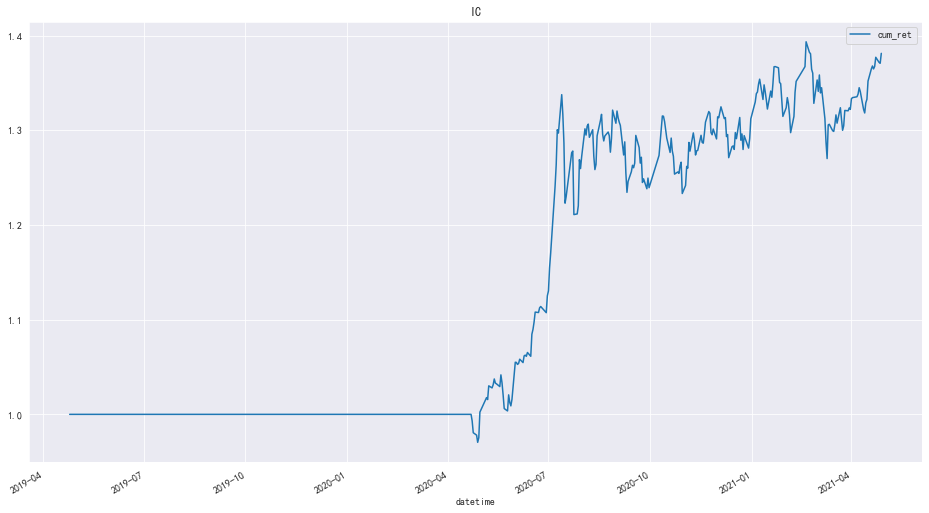

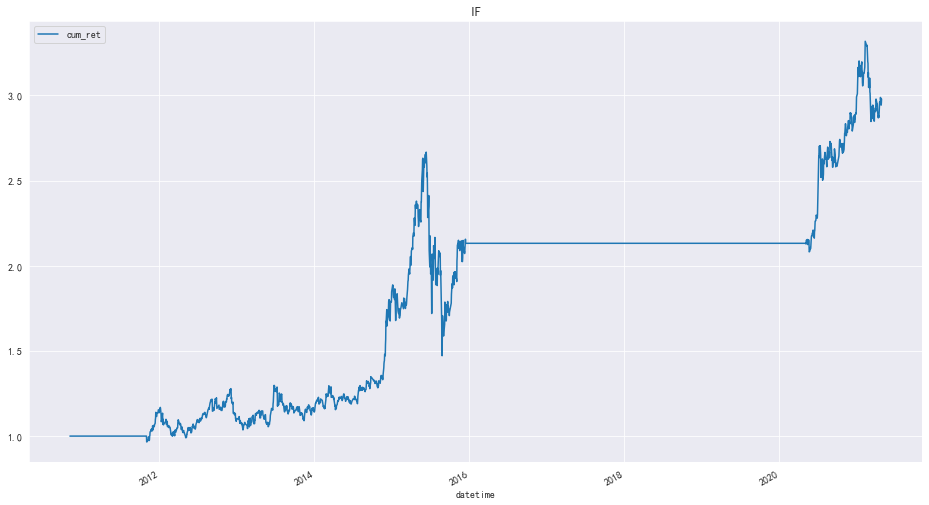

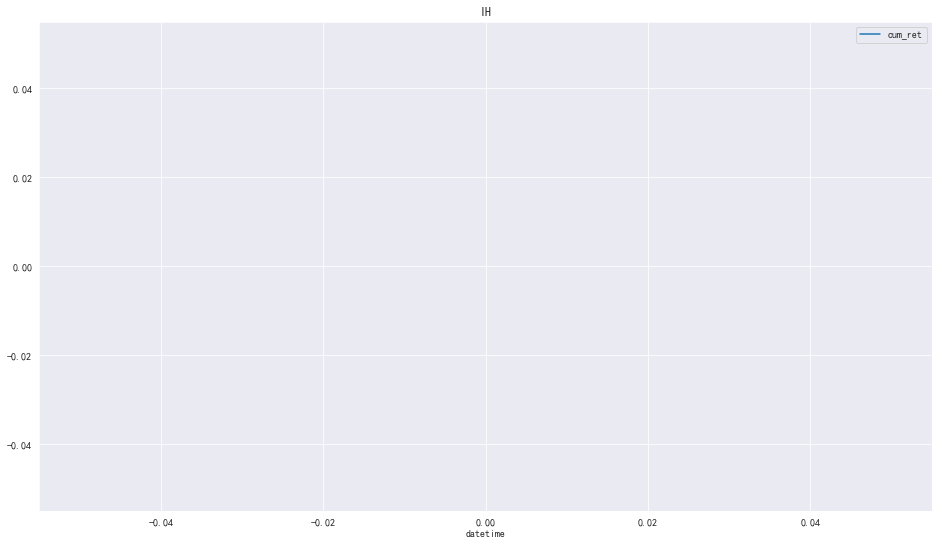

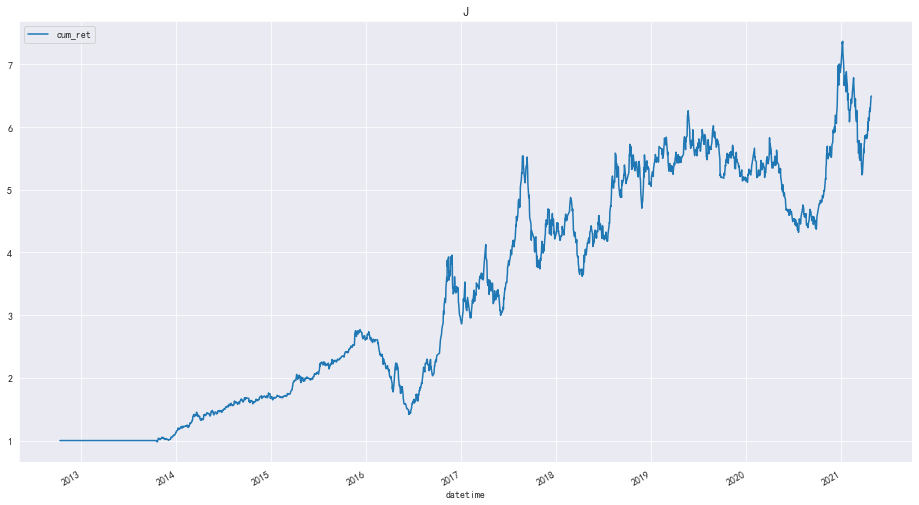

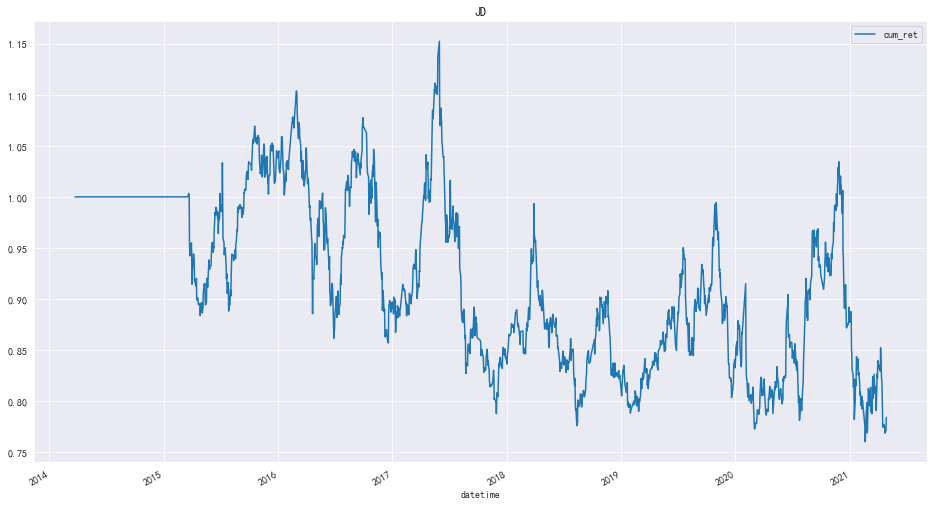

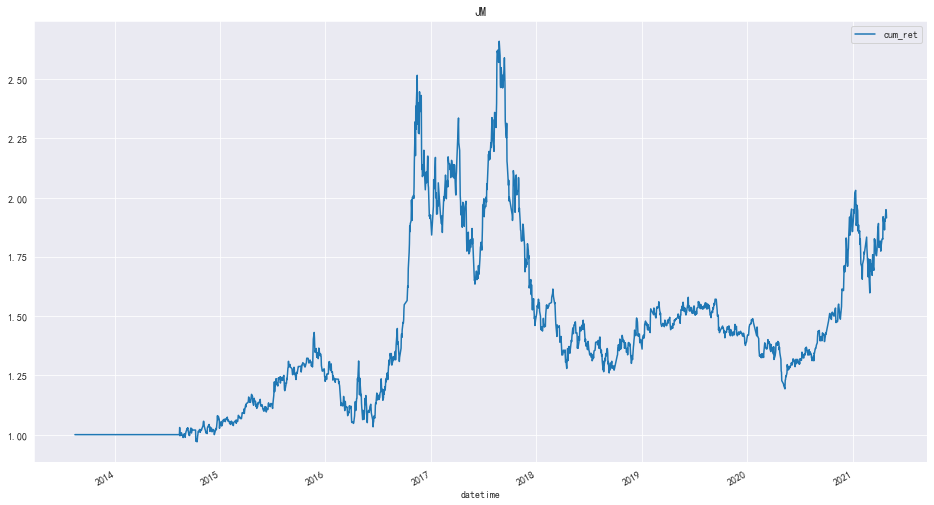

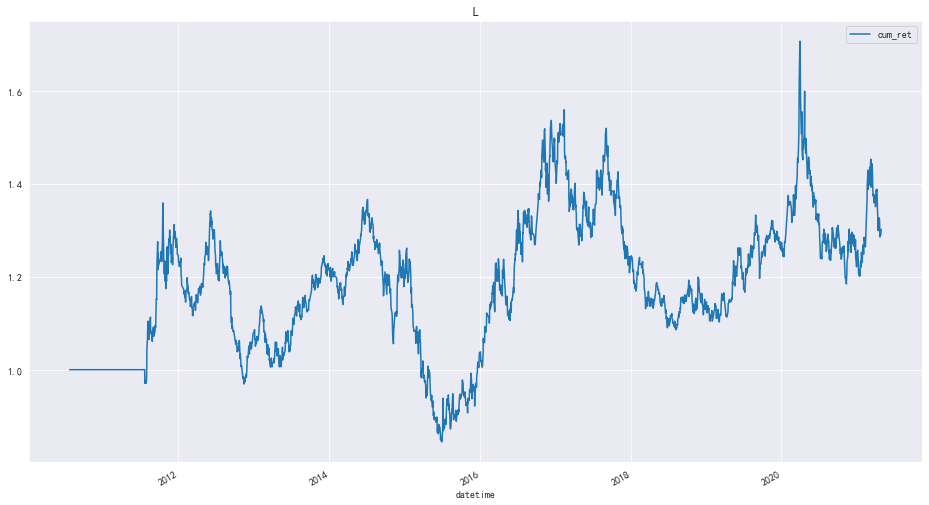

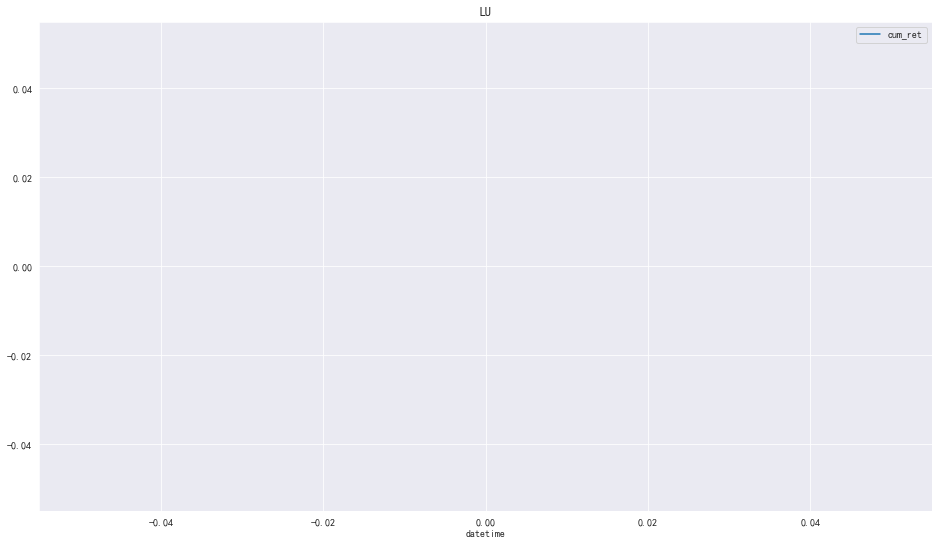

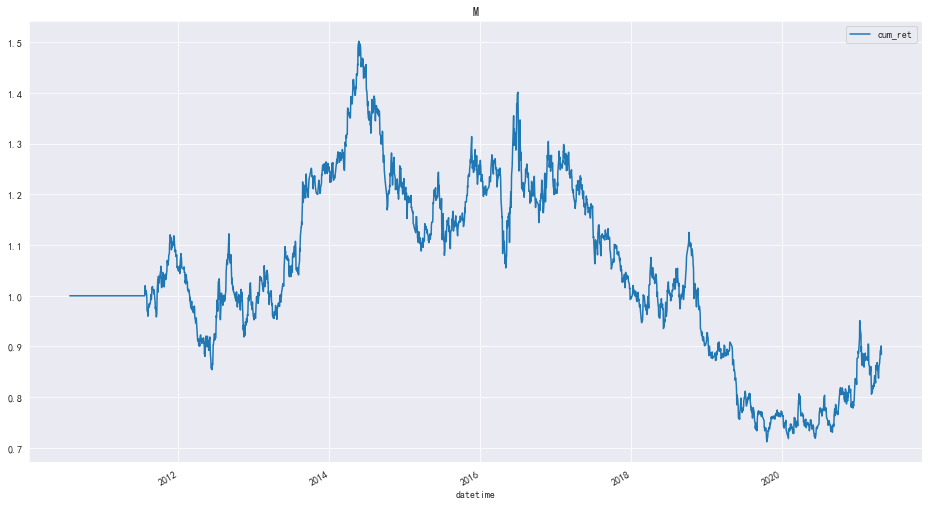

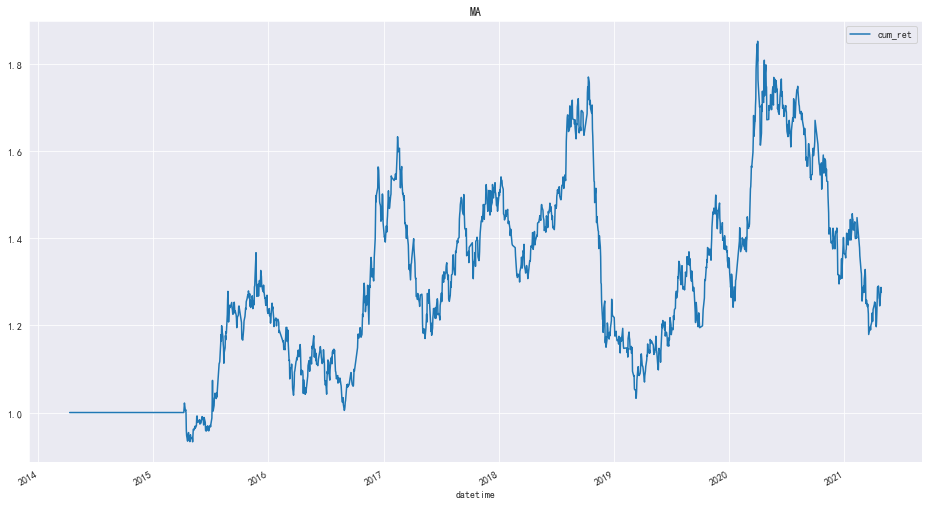

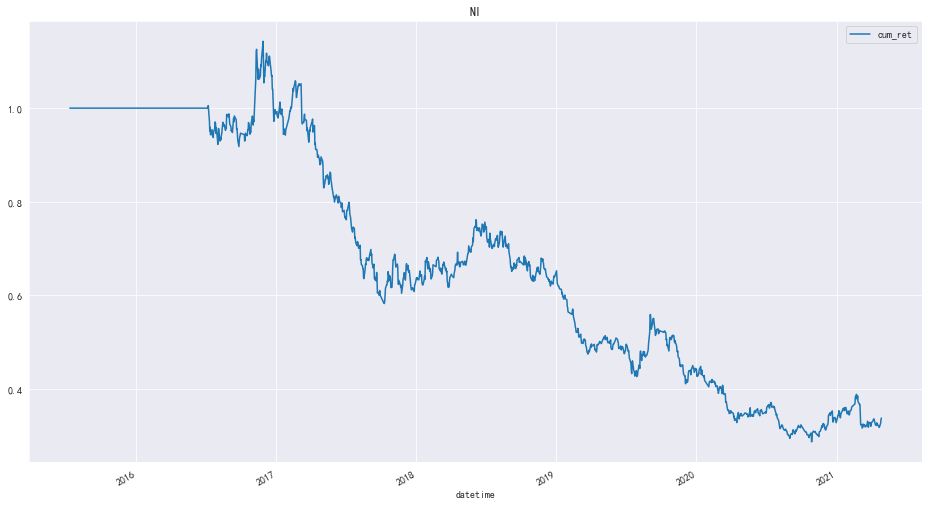

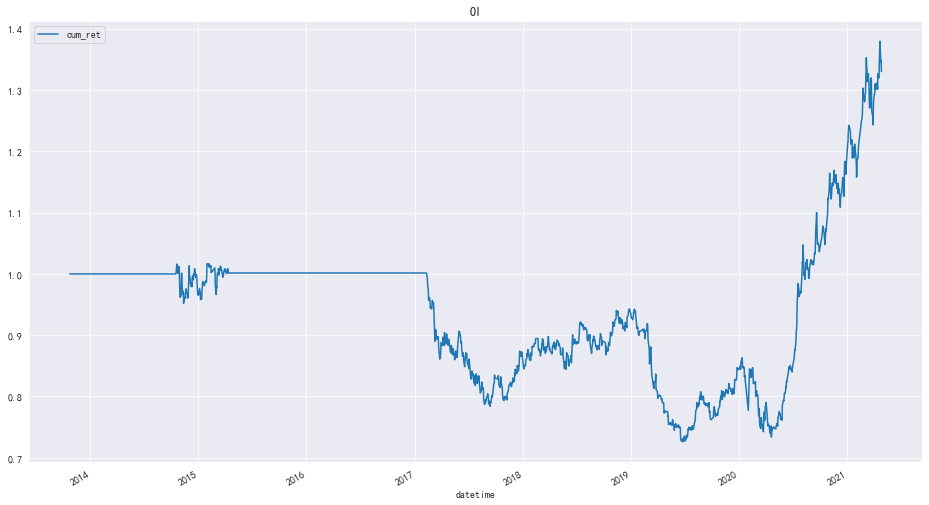

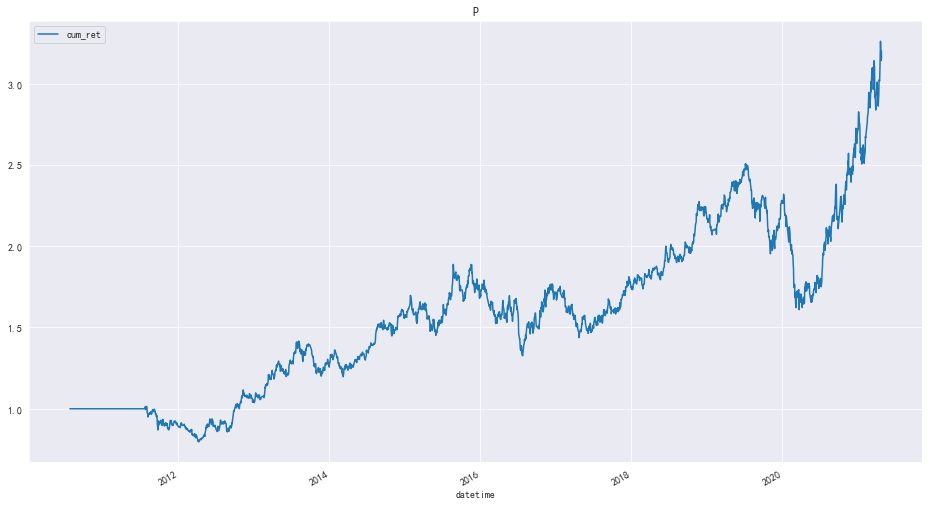

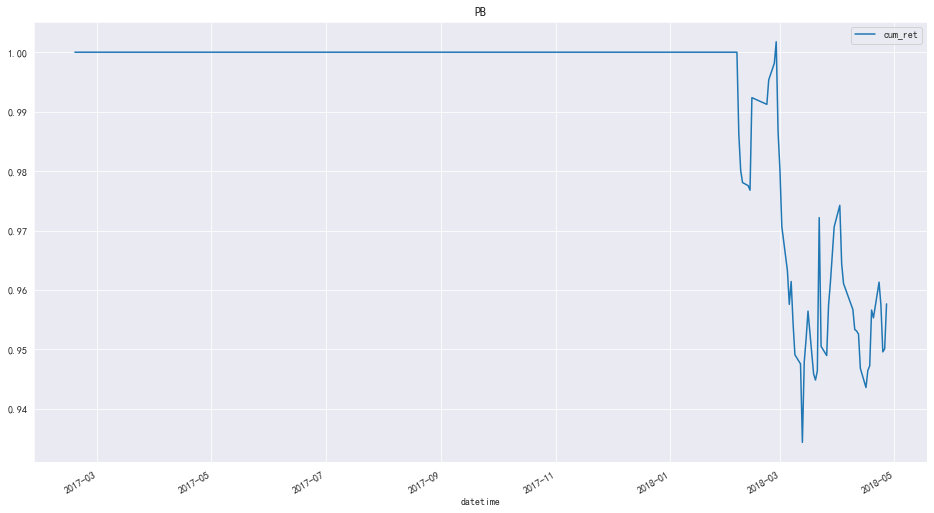

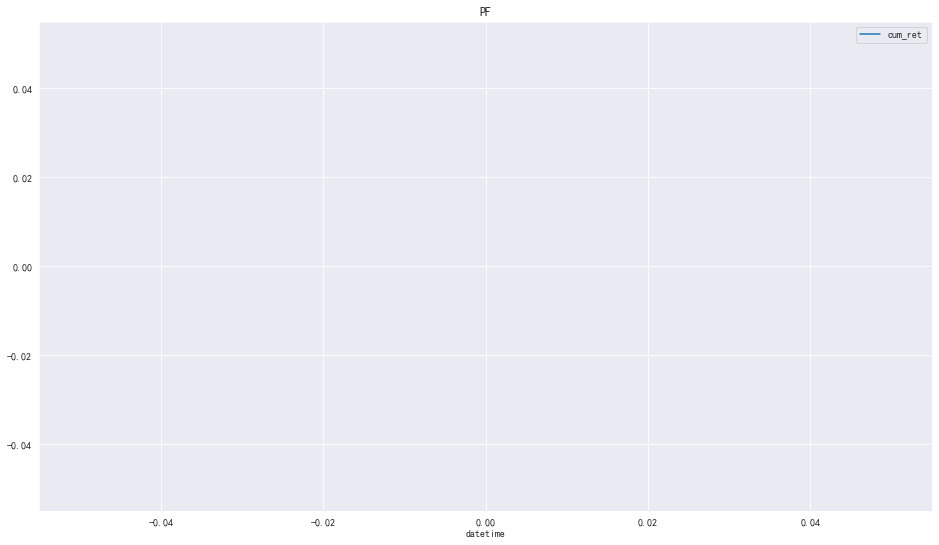

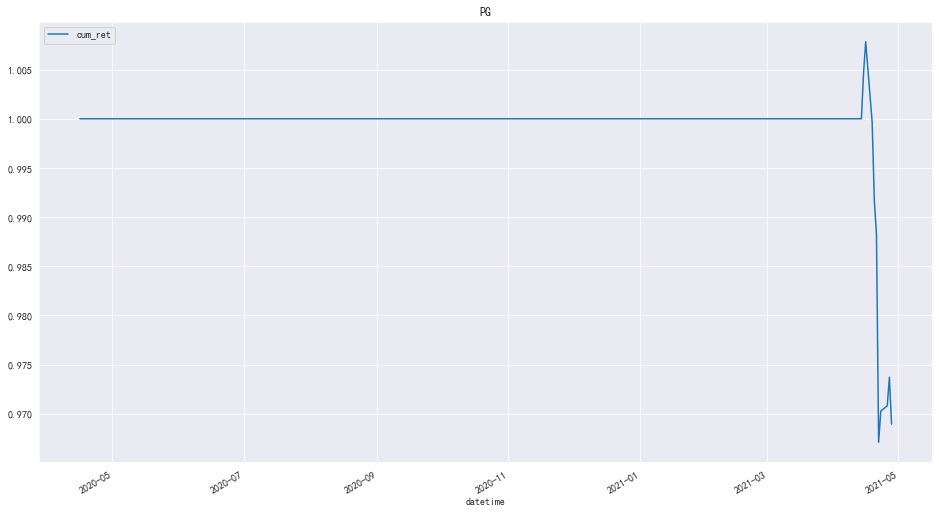

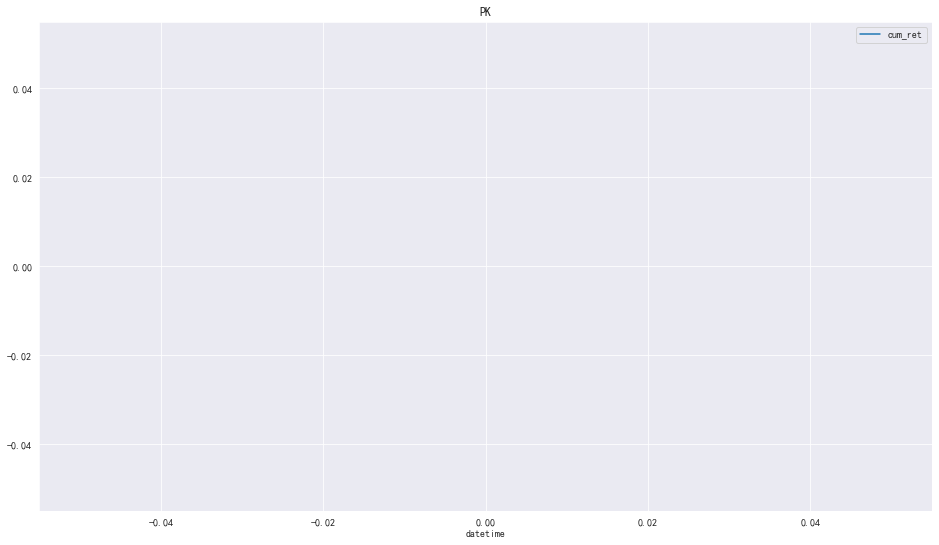

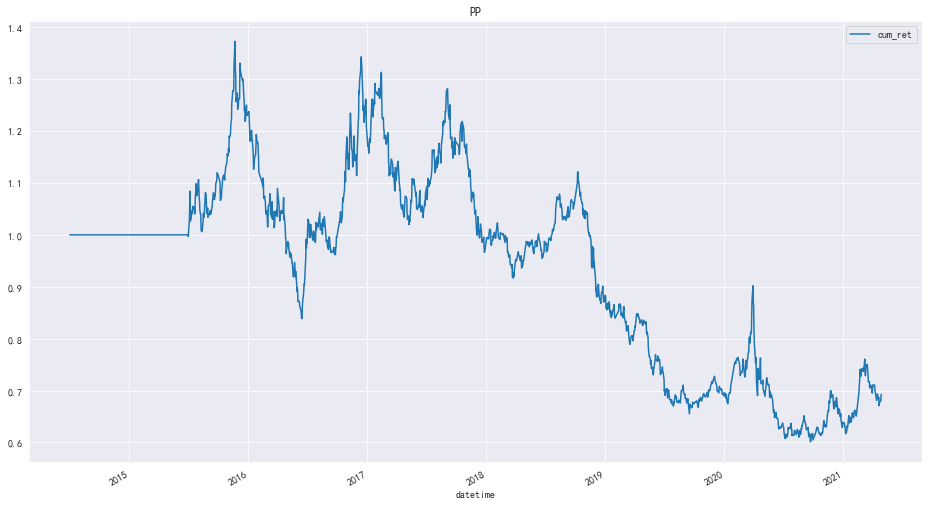

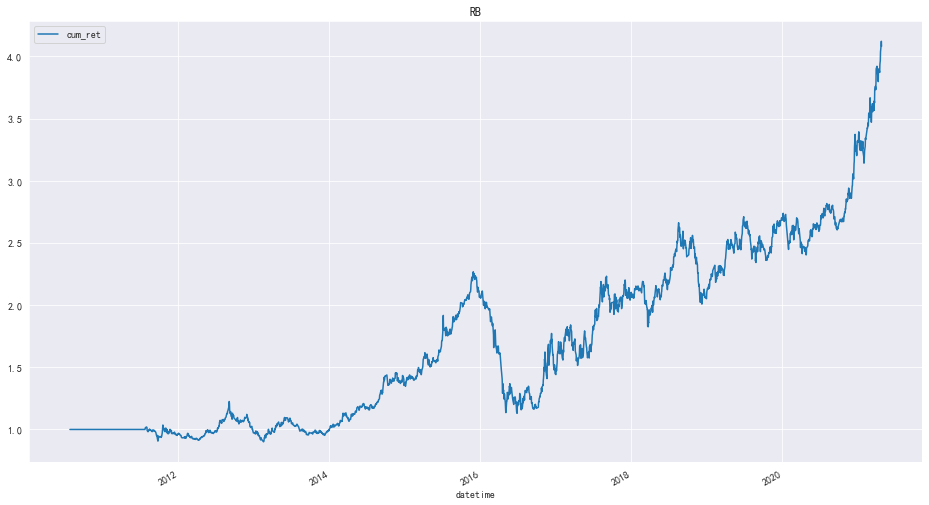

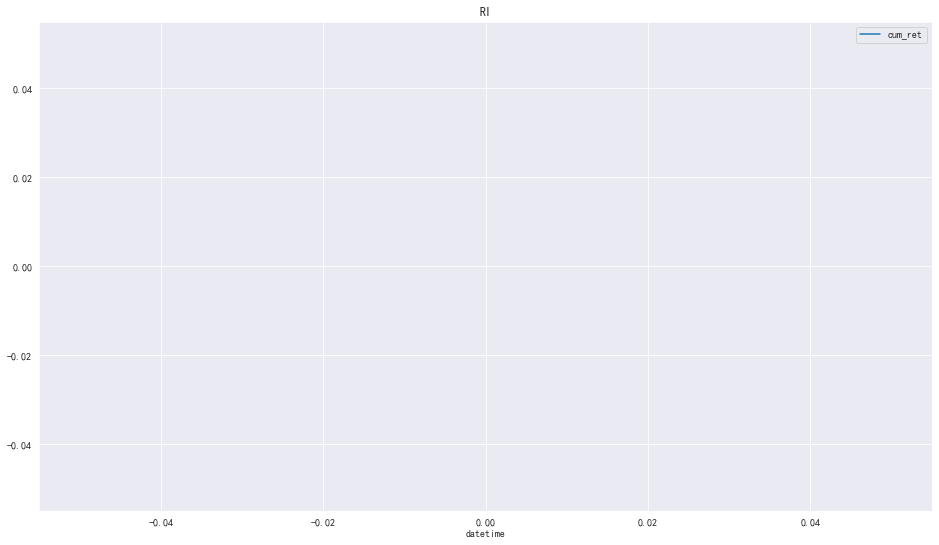

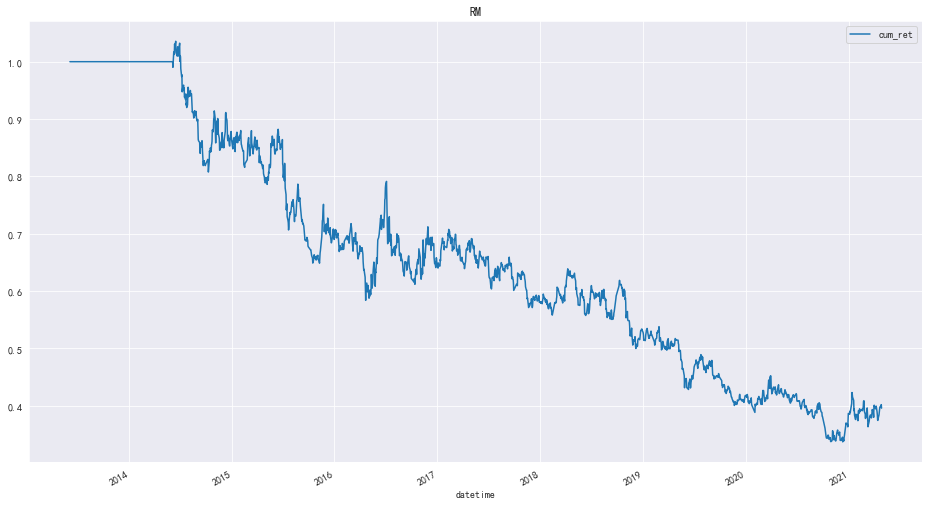

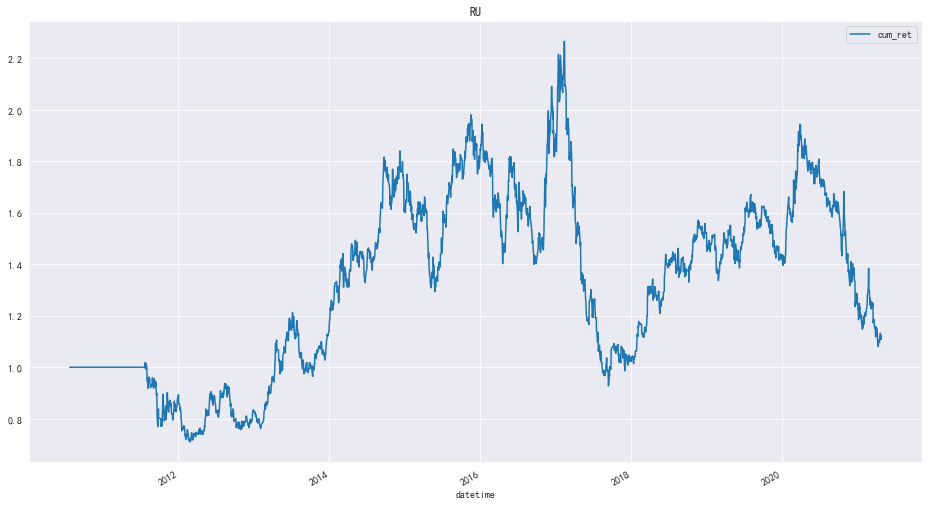

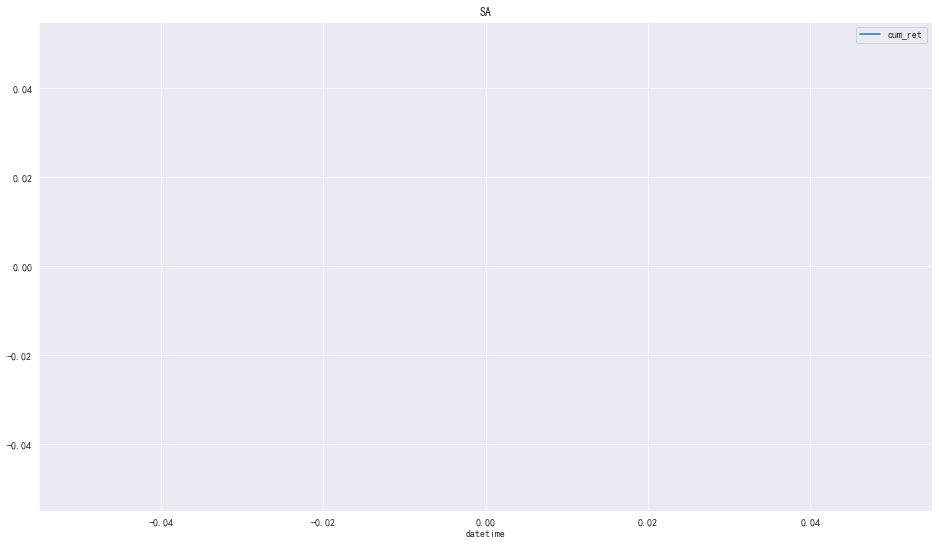

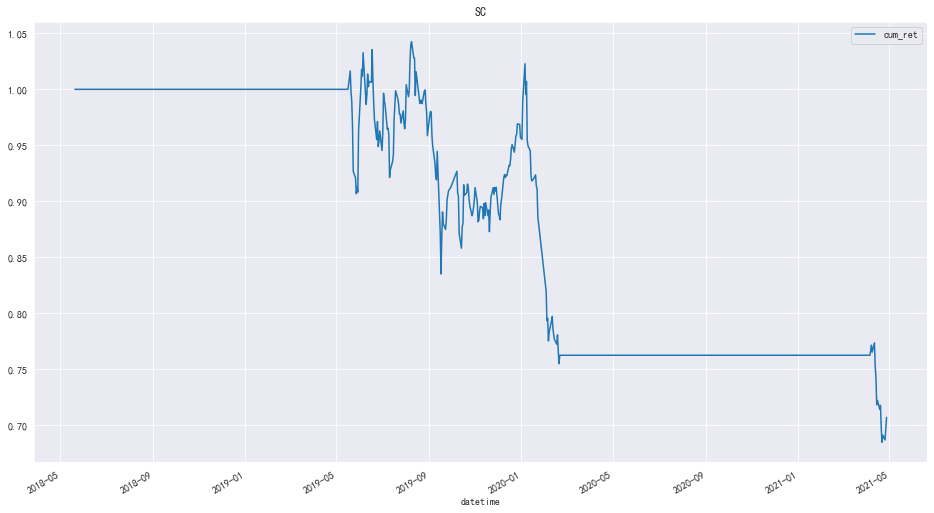

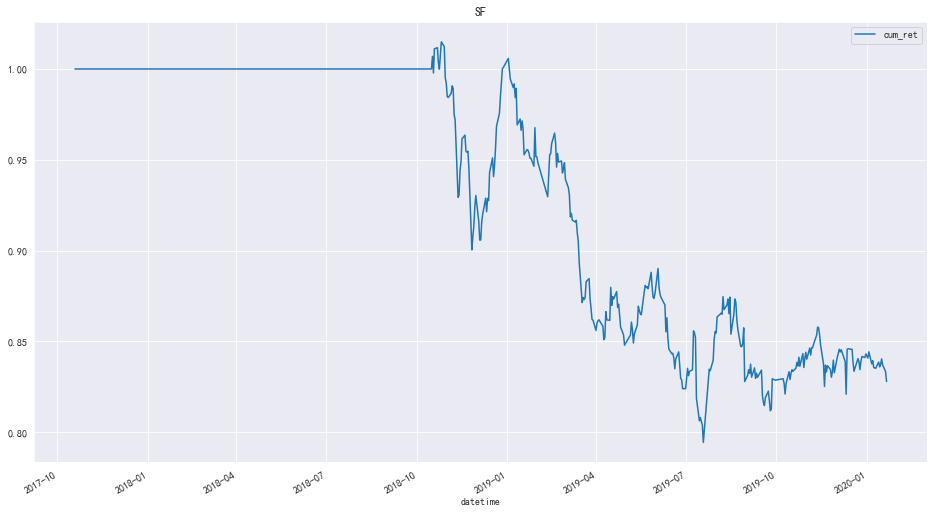

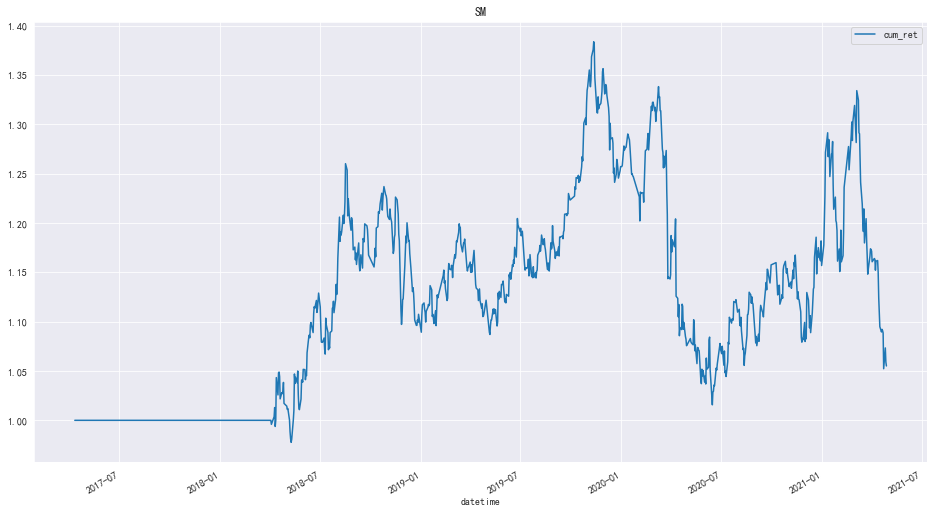

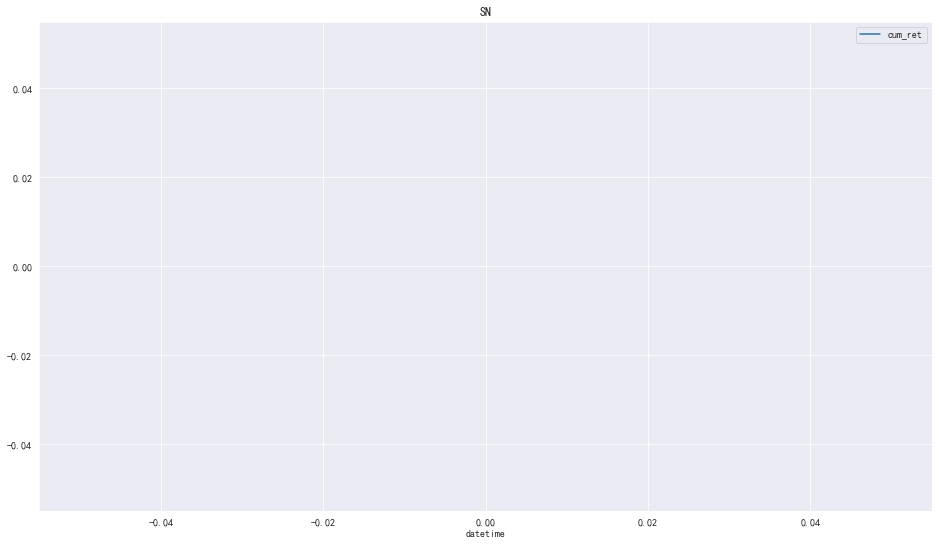

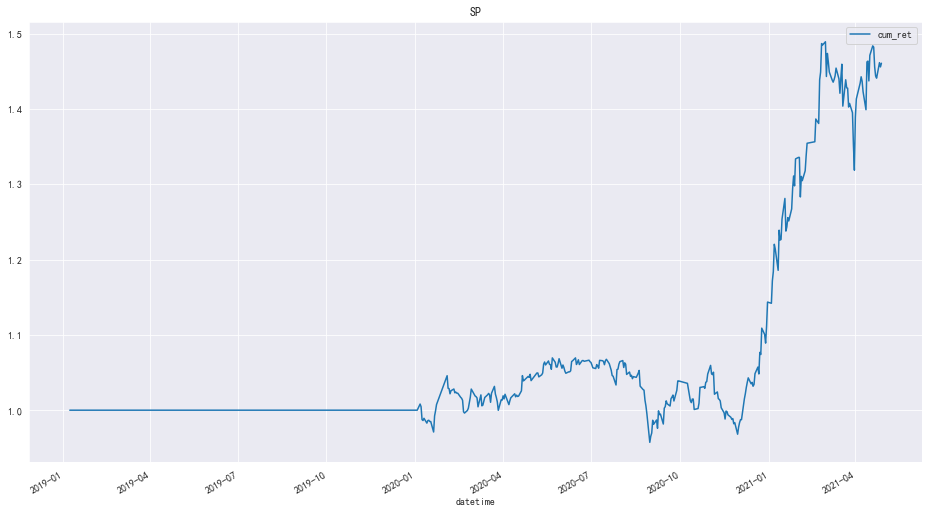

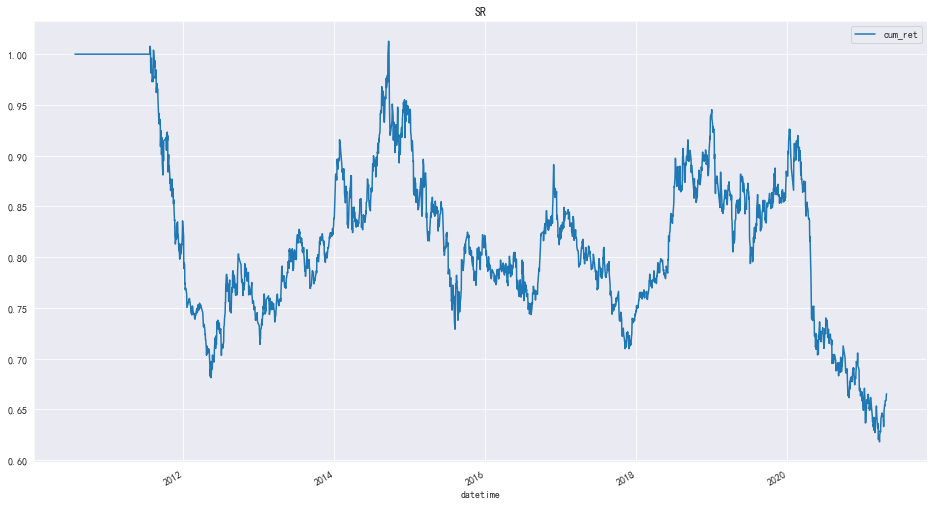

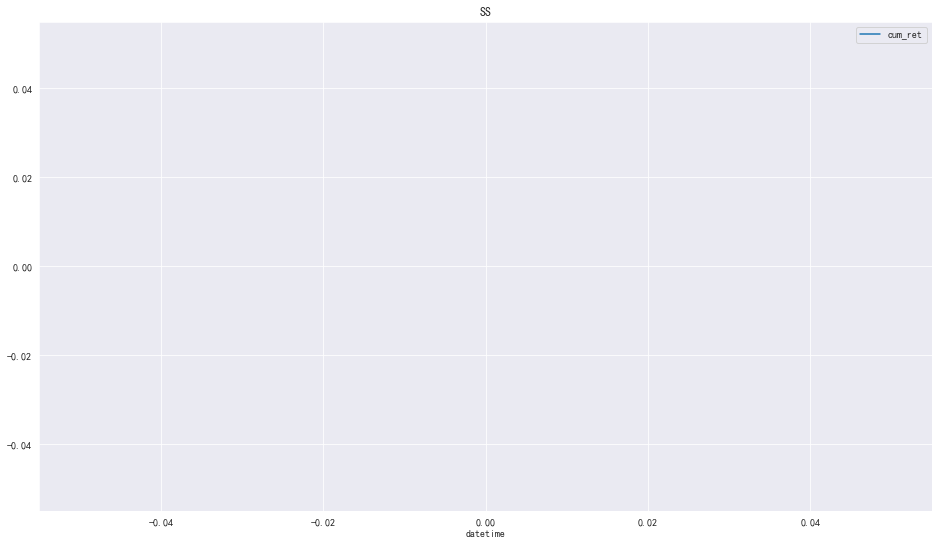

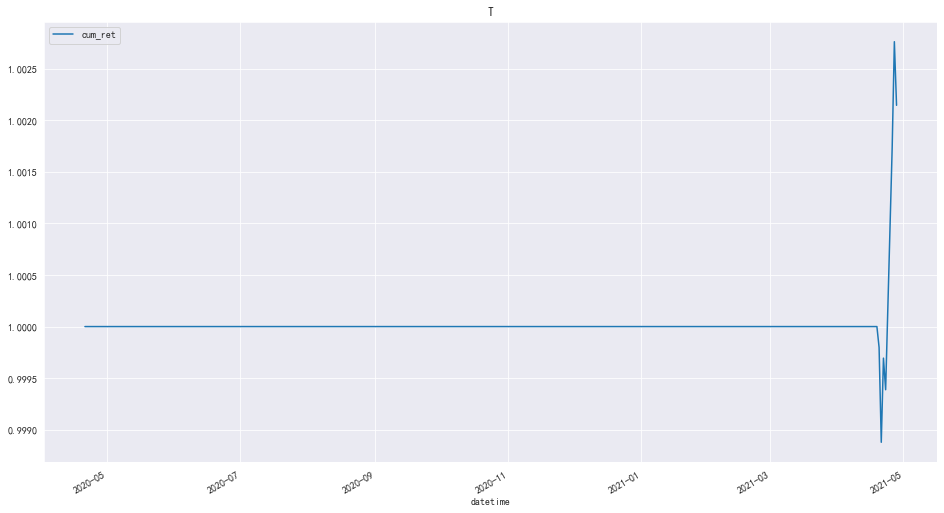

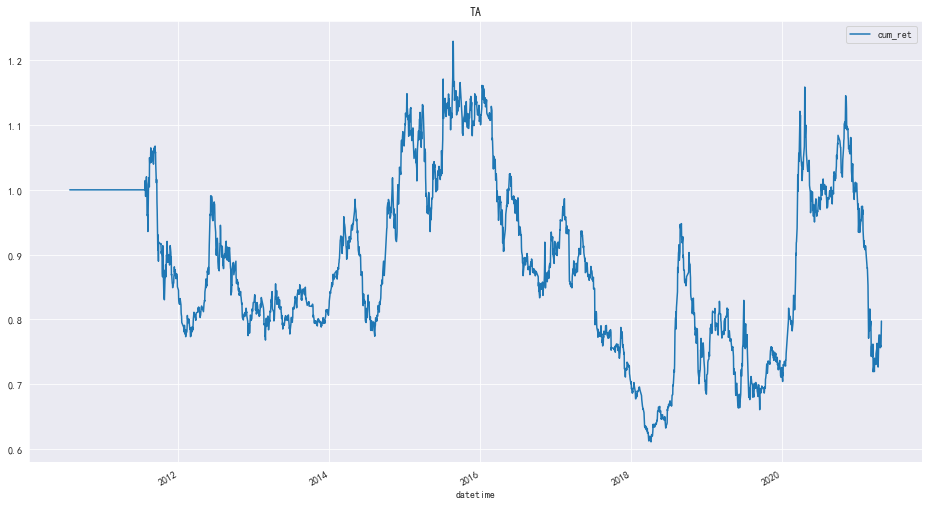

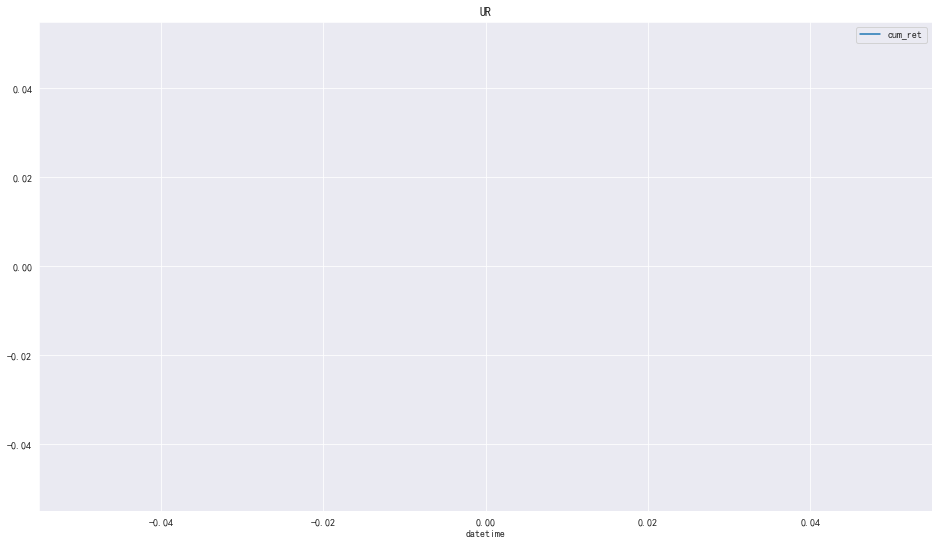

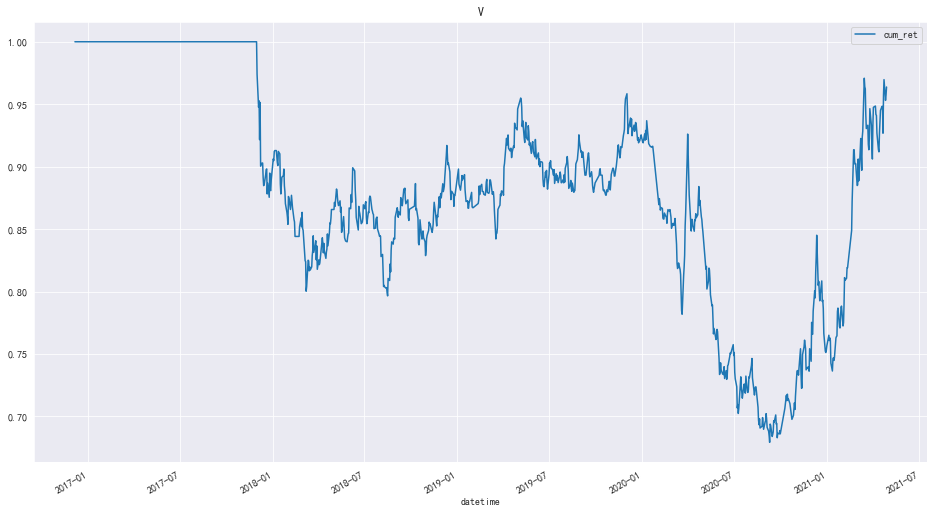

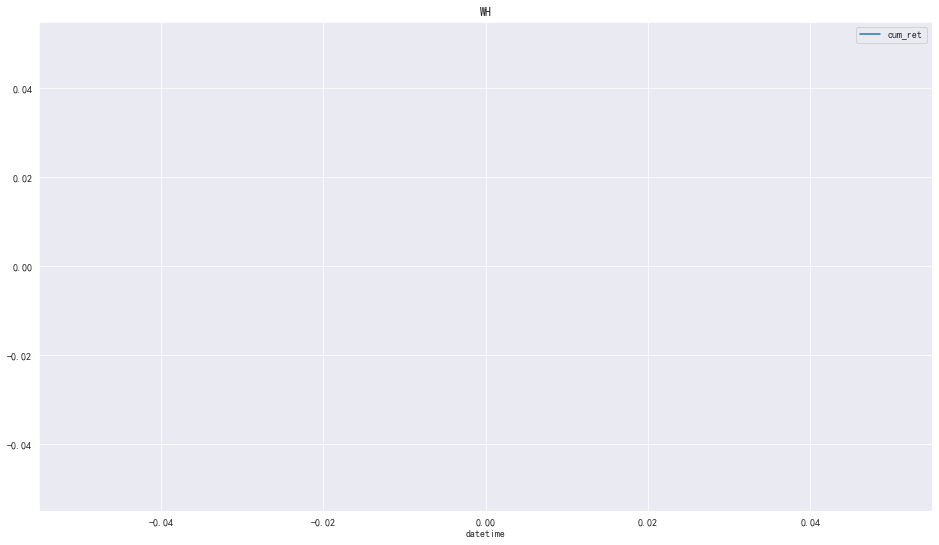

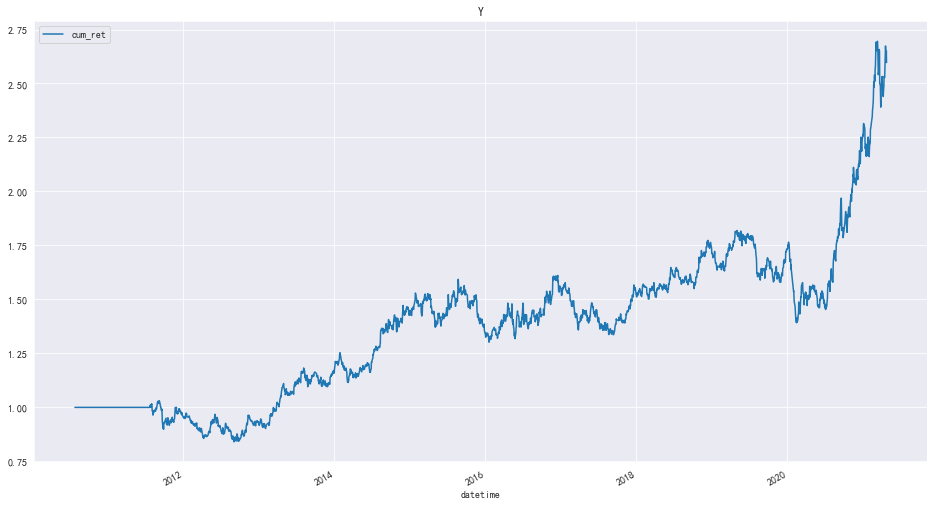

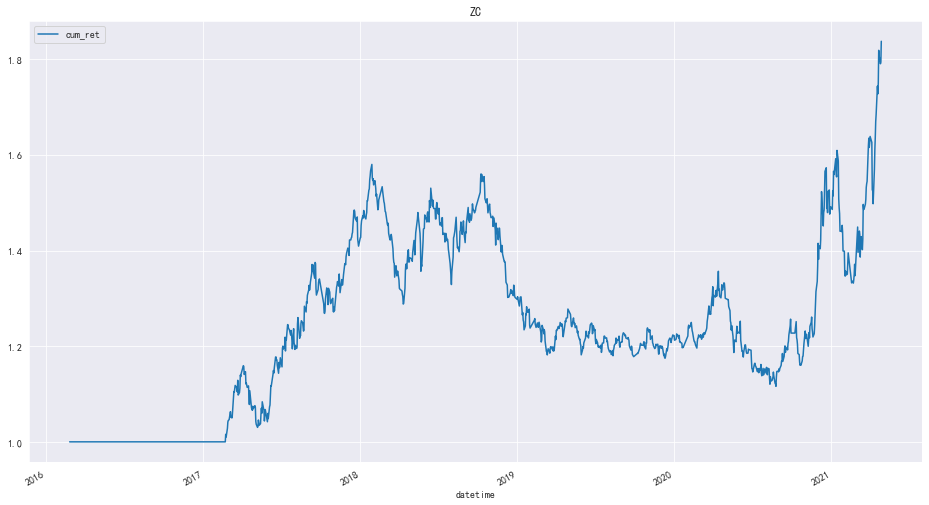

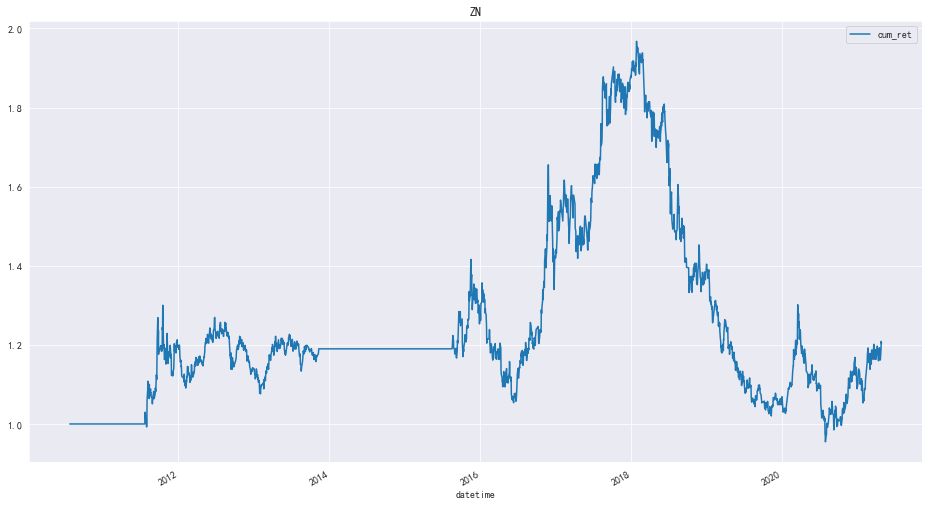

In [3]:
for c in C_DAILY:
    cursord = query(db_name=DB, col='daily', category=c, period=240, use_real_price=False)
    cum_retd = avg_cum_ret_from_cursor(cursord)
    cum_retd.plot(title=c, figsize=(16, 9))

In [4]:
# def mean_annual_return(cum_ret):
#     """平均年化收益率"""
#     ret = cal_ret(cum_ret)
#     ann_ret = empyrical.annual_return(ret)
#     return np.mean(ann_ret)


# 每个品种在每组参数上的收益率
all_performances = defaultdict(list)
for c in C_DAILY:
    for period in period_rng:
        cursor = query(db_name=DB, col='daily', category=c, period=period, use_real_price=False)
        cum_ret = avg_cum_ret_from_cursor(cursor)
        all_performances[c].append(cum_ret)
        

# 各个品种在最佳参数上的收益率，行情时间小于200天的剔除
best_performance = dict()
for c , cr_list in all_performances.items():
    long_enough_crs = [cr for cr in cr_list if len(cr) > 200]
    if long_enough_crs:
        best_performance[c] = max(map(avg_annual_ret, long_enough_crs))

best_performance = OrderedDict(sorted(best_performance.items(),key=lambda it: it[1], reverse=True))

<BarContainer object of 48 artists>

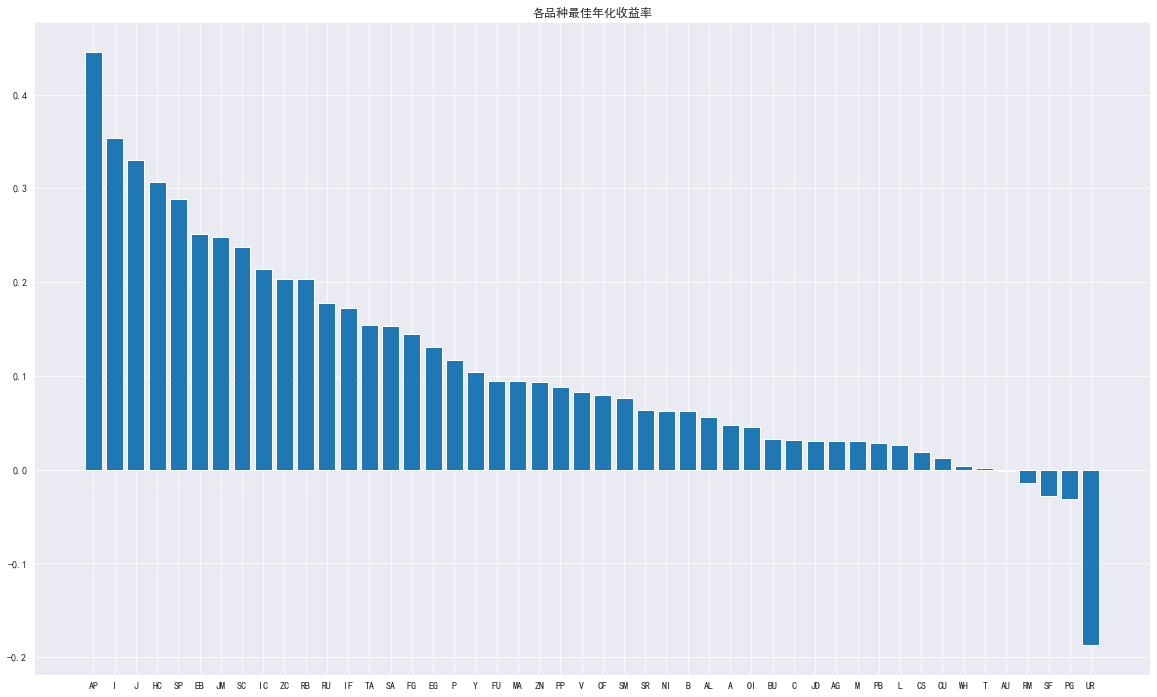

In [5]:
fig = plt.figure(figsize=(20, 12))
plt.title('各品种最佳年化收益率')
plt.bar(best_performance.keys(), best_performance.values())

文献中表现较好的品种：ER, UR, I, SC, SA, J, HC, AP, PF, SP  
本研究中表现较好的品种：AP, I, J, HC, SP, EB, JN, SC, IC, ZC, RB